# Pandas简介

Pandas 是在 NumPy 基础上建立的新程序库，提供了一种高效的 DataFrame
数据结构。 DataFrame 本质上是一种带行标签和列标签、支持相同类型数据和缺失值的多
维数组。Pandas 不仅为带各种标签的数据提供了便利的存储界面，还实现了许多强大的操
作，这些操作对数据库框架和电子表格程序的用户来说非常熟悉。

In [1]:
import pandas
pandas.__version__

'1.1.5'

和之前导入 NumPy 并使用别名 np 一样，我们将导入 Pandas 并使用别名 pd ：

In [2]:
import pandas as pd

# Pandas对象简介
Pandas 的三个基本数据结构： Series 、 DataFrame 和 Index

In [3]:
import numpy as np
import pandas as pd

## Series对象
Pandas 的 Series 对象是一个带索引数据构成的一维数组。可以用一个数组创建Series 对象，如下所示

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

从上面的结果中，可以发现 Series 对象将一组数据和一组索引绑定在一起，可以通过
values 属性和 index 属性获取数据。 values 属性返回的结果与 NumPy 数组类似：

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

index 属性返回的结果是一个类型为 pd.Index 的类数组对象，我们将在后面的内容里详细
介绍它：

In [6]:
 data.index

RangeIndex(start=0, stop=4, step=1)

和 NumPy 数组一样，数据可以通过 Python 的中括号索引标签获取：

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series和Numpy关系
两者间的本质差异其实是索引：NumPy 数组通过隐式定义的整数索引获取数值，而 Pandas 的
Series 对象用一种显式定义的索引与数值关联.

显式索引的定义让 Series 对象拥有了更强的能力。例如，索引不再仅仅是整数，还可以是
任意想要的类型

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['a']

0.25

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [12]:
data[5]

0.5

###  Series :是特殊的字典
字典是一种将任意键映射到一组任意值的数据结构，而 Series 对象其实是一种将类型键映射到一组类型值的数据结构。

Series比python字典更加高效

In [13]:
 population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}

In [14]:
population_dict

{'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}

In [15]:
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [16]:
 population['California']

38332521

In [17]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### 创建 Series
我们已经见过几种创建 Pandas 的 Series 对象的方法，都是像这样的形式：

> pd.Series(data, index=index)

其中， index 是一个可选参数， data 参数支持多种数据类型。
例如， data 可以是列表或 NumPy 数组，这时 index 默认值为整数序列

In [18]:
 pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [19]:
 #data 也可以是一个标量，创建 Series 对象时会重复填充到每个索引上
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [20]:
#data 还可以是一个字典， index 默认是排序的字典键
pd.Series({2:'a', 1:'b', 3:'c'}) 

2    a
1    b
3    c
dtype: object

## DataFrame 对象：Pandas核心
如果将 Series 类比为带灵活索引的一维数组，那么 DataFrame 就可以看作是一种既有灵活
的行索引，又有灵活列名的二维数组。

In [21]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [22]:
 population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [23]:
states = pd.DataFrame({'population': population,
'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


和 Series 对象一样， DataFrame 也有一个 index 属性可以获取索引标签：

In [23]:
 states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

 DataFrame 还有一个 columns 属性，是存放列标签的 Index 对象：

In [24]:
states.columns

Index(['population', 'area'], dtype='object')

 DataFrame 可以看作一种通用的 NumPy 二维数组，它的行与列都可以通过索引获取

### DataFrame和字典
与 Series 类似，我们也可以把 DataFrame 看成一种特殊的字典。字典是一个键映射一个
值，而 DataFrame 是一列映射一个 Series 的数据。

需要注意的是，在 NumPy 的二维数组里， data[0] 返回第一行；而在 DataFrame 中，
data['col0'] 返回第一列。

In [25]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### 创建 DataFrame 对象

(1) 通过单个 Series 对象创建。 DataFrame 是一组 Series 对象的集合，可以用单个 Series
创建一个单列的 DataFrame 

In [26]:
 pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


(2) 通过字典列表创建。任何元素是字典的列表都可以变成 DataFrame 。

In [27]:
data = [{'a': i, 'b': 2 * i}
for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [28]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


(3) 通过 Series 对象字典创建。

In [29]:
pd.DataFrame({'population': population,
'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


通过 NumPy 二维数组创建。假如有一个二维数组，就可以创建一个可以指定行列索引
值的 DataFrame 。如果不指定行列索引值，那么行列默认都是整数索引值

In [30]:
pd.DataFrame(np.random.rand(3, 2),
columns=['foo', 'bar'],
index=['a', 'b', 'c'])

,foo,bar
a,0.782547,0.081043
b,0.647518,0.729297
c,0.608112,0.009994


In [32]:
c = pd.DataFrame([[1,2],[3,4]],
columns=['f1', 'f2'],
index=['a', 'b'])

In [33]:
c

,f1,f2
a,1,2
b,3,4


In [34]:
c.shape

(2, 2)

In [35]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, a to b
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f1      2 non-null      int64
 1   f2      2 non-null      int64
dtypes: int64(2)
memory usage: 156.0+ bytes


### 读取csv作为dataframe

In [4]:
d = pd.read_csv('./datasets/titanic_train.csv')

In [5]:
d.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
d.shape

(891, 12)

In [7]:
d.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 一些小方法

#### 将dataframe两列转换为字典

In [12]:
d_name_age_dict = d[['Name','Age']][:20].set_index('Name').to_dict()['Age']

In [13]:
d_name_age_dict

{'Braund, Mr. Owen Harris': 22.0,
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)': 38.0,
 'Heikkinen, Miss. Laina': 26.0,
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)': 35.0,
 'Allen, Mr. William Henry': 35.0,
 'Moran, Mr. James': nan,
 'McCarthy, Mr. Timothy J': 54.0,
 'Palsson, Master. Gosta Leonard': 2.0,
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)': 27.0,
 'Nasser, Mrs. Nicholas (Adele Achem)': 14.0,
 'Sandstrom, Miss. Marguerite Rut': 4.0,
 'Bonnell, Miss. Elizabeth': 58.0,
 'Saundercock, Mr. William Henry': 20.0,
 'Andersson, Mr. Anders Johan': 39.0,
 'Vestrom, Miss. Hulda Amanda Adolfina': 14.0,
 'Hewlett, Mrs. (Mary D Kingcome) ': 55.0,
 'Rice, Master. Eugene': 2.0,
 'Williams, Mr. Charles Eugene': nan,
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)': 31.0,
 'Masselmani, Mrs. Fatima': nan}

## Pandas的 Index 对象
 Series 和 DataFrame 对象都使用便于引用和调整的显式索引。Pandas 的
Index 对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合

In [44]:
#用一个简单的整数列表来创建一个 Index 对象：
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

Index 对象的许多操作都像数组。例如，可以通过标准 Python 的取值方法获取数值，也可
以通过切片获取数值：

In [45]:
ind[1]

3

In [46]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [47]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


Index 对象与 NumPy 数组之间的不同在于， Index 对象的索引是不可变的，也就是说不能
通过通常的赋值方式进行调整

Index 对象遵循 Python 标准库的集合（ set ）数据结构的许多习惯用法，包括并集、交集、
差集等

In [48]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [49]:
indA.intersection(indB) # 交集

Int64Index([3, 5, 7], dtype='int64')

In [50]:
indA.union(indB) # 并集

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

### dataframe 的index

通过 dataframe.set_index('col_name') 可以把一列设为索引列

通过 dataframe.reset_index() 可以重置索引列

通过 dataframe.set_index('col_name').reset_index() 可以把某一列放到第一列去

# 数据取值与选择

##  Series 数据选择方法
Series 对象与一维 NumPy 数组和标准 Python 字典在许多方面都一样。

### 类似字典，数组的操作

In [51]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [52]:
data['b']

0.5

In [53]:
'a' in data

True

In [54]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [55]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [56]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Series 不仅有着和字典一样的接口，而且还具备和 NumPy 数组一样的数组数据选择功能，
包括索引、掩码、花哨的索引等操作

In [57]:
# 将显式索引作为切片
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [58]:
# 将隐式整数索引作为切片
data[0:2]

a    0.25
b    0.50
dtype: float64

In [59]:
# 掩码
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [60]:
 # 花哨的索引
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

需要注意的是，当使用显式索引（即
data['a':'c'] ）作切片时，结果**包含**最后一个索引；而当使用隐式索引（即 data[0:2] ）
作切片时，结果**不包含**最后一个索引。

### 索引器： loc 、 iloc 
 Pandas 提供了一些索引器（indexer）属性来作为取值
的方法

第一种索引器是 loc 属性，表示取值和切片都是显式的：

In [61]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [62]:
data.loc['a']

0.25

In [63]:
data.loc['a':'b']

a    0.25
b    0.50
dtype: float64

第二种是 iloc 属性，表示取值和切片都是 Python 形式的
隐式索引：

In [64]:
 data.iloc[1]

0.5

In [65]:
 data.iloc[1:3]

b    0.50
c    0.75
dtype: float64

##  DataFrame 数据选择方法

### 类似字典、数组的操作

In [66]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


可以通过对列名进行字典形式（dictionary-style）
的取值获取数据：

In [67]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

也可以用属性形式（attribute-style）选择纯字符串列名的数据：

In [68]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

还可以用字典形式的语法调整对象，如果要增加一列可以
这样做：

In [69]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


还应该避免对用属性形式选择的列直接赋值（即可以用 data['pop'] = z ，但不要用
data.pop = z ）

可以把 DataFrame 看成是一个增强版的二维数组，用 values 属性按行查看数
组数据：

In [70]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [71]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [71]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

通过 iloc 索引器，我们就可以像对待 NumPy 数组一样索引 Pandas
的底层数组（Python 的隐式索引）， DataFrame 的行列标签会自动保留在结果中：

In [72]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [73]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


任何用于处理 NumPy 形式数据的方法都可以用于这些索引器。例如，可以在 loc 索引器
中结合使用掩码与花哨的索引方法：

In [74]:
 data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


### 其它取值方式

掩码操作也可以直接对每一行进行过滤，而不需要使用 loc 索引器：

In [75]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [76]:
 data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


切片也可以不用索引值，而直接用行数来实现：

In [77]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


# 数值运算方法
NumPy 的基本能力之一是快速对每个元素进行运算，既包括基本算术运算（加、减、乘、
除），也包括更复杂的运算（三角函数、指数函数和对数函数等）。Pandas 继承了 NumPy
的功能

但是 Pandas 也实现了一些高效技巧：对于一元运算（像函数与三角函数），这些通用函
数将在输出结果中保留索引和列标签；而对于二元运算（如加法和乘法），Pandas 在传递
通用函数时会自动对齐索引进行计算。

## 保留索引

In [78]:
import pandas as pd
import numpy as np

In [81]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [82]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [83]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [84]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


任何一种在 numpy通用函数一节介绍过的通用函数都可以按照类似的方式使用

## 索引对齐

###  Series 索引对齐

In [81]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')

In [82]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

对于缺失位置的数据，Pandas 会用 NaN 填充，表示“此处无数”。这是 Pandas 表示缺失值
的方法

In [83]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [84]:
A

0    2
1    4
2    6
dtype: int64

In [85]:
B

1    1
2    3
3    5
dtype: int64

In [86]:
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [87]:
A.add(B)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [88]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### DataFrame 索引对齐

In [90]:
import pandas as pd

In [93]:
rng = np.random.RandomState(42)

In [94]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('AB'))
A

,A,B
0,6,19
1,14,10


In [95]:
 B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('BAC'))
B

,B,A,C
0,7,4,6
1,9,2,6
2,7,4,3


In [96]:
A + B

,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


两个对象的行列索引可以是不同顺序的，结果的索引会自动按顺序排列

Python运算符与Pandas方法的映射关系
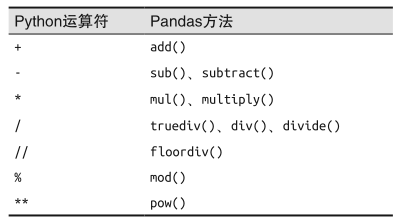

### DataFrame 与 Series 的运算
DataFrame 和 Series 的运算规则，与 NumPy 中二维数组与一维数组的运算规则是
一样的

In [97]:
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
A

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7]])

In [98]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

In [99]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [100]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,0,6,-5,2
2,1,1,-4,3


如果你想按列计算，那么就需要利用前面介绍过的运算符方法，通过 axis 参数设置：

In [102]:
df

,Q,R,S,T
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [101]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,4,1
1,-3,0,-7,-3
2,3,0,-1,3


# 缺失值处理
现实工作中的数据的区别在于后者很少是干净整齐的，许多目前流行的数据集都会有数据缺失的现象。
处理不同数据源缺失值的方法还不同。

缺失值主要有三种形
式：null、NaN 或 NA

In [103]:
import numpy  as np
import pandas as pd

## 缺失值
在数据表或 DataFrame 中有很多识别缺失值的方法。一般情况下可以分为两种：一种方法是通过一个覆盖全局的掩码表示缺失值，另一种方法是用一个标签值（sentinel value）表示缺失值。

在掩码方法中，掩码可能是一个与原数组维度相同的完整布尔类型数组，也可能是用一个比特（0 或 1）表示有缺失值的局部状态。

在标签方法中，标签值可能是具体的数据（例如用 -9999 表示缺失的整数），也可能是些极少出现的形式。另外，标签值还可能是更全局的值，比如用 NaN （不是一个数）表示缺失的浮点数，它是 IEEE 浮点数规范中指定的特殊字符。

Pandas 用标签方法表示缺失值，包括两种 Python 原
有的缺失值：浮点数据类型的 NaN 值，以及 Python 的 None 对象。

### None
Pandas 可以使用的第一种缺失值标签是 None ，它是一个 Python 单体对象，经常在代码中
表示缺失值。

In [104]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

使用 Python 对象构成的数组就意味着如果你对一个包含 None 的数组进行累计操作，如
sum() 或者 min() ，那么通常会出现类型错误：

In [105]:
 vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

### NaN：数值类型的缺失值
 NaN （全称 Not a Number，不是一个数字），是一种按照 IEEE 浮点
数标准设计、在任何系统中都兼容的特殊浮点数

In [106]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [107]:
 1 + np.nan

nan

In [108]:
 0 * np.nan

nan

In [109]:
np.nansum(vals2)

8.0

### None 和NaN关系
 Pandas 把它们看成是可以等价交换的，在适当的时
候会将两者进行替换：Pandas 会自动将 None 转换为
NaN

In [110]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

## 缺失值处理
Pandas 提供了一些方法来发现、剔除、替换数据结构中的缺失值，主要包
括以下几种。

>isnull()

创建一个布尔类型的掩码标签缺失值。
>notnull()

与 isnull() 操作相反。
>dropna()

返回一个剔除缺失值的数据。
>fillna()

返回一个填充了缺失值的数据副本。

### 发现缺失值
Pandas 数据结构有两种有效的方法可以发现缺失值： isnull() 和 notnull() 。每种方法都返回布尔类型的掩码数据

 isnull() 和 notnull() 同样适用于 Series 和 DataFrame

In [111]:
import pandas as pd

In [112]:
 data = pd.DataFrame([1, np.nan, 'hello', None])
data

,0
0,1
1,NaN
2,hello
3,None


In [3]:
 data.isnull()

,0
0,False
1,True
2,False
3,True


布尔类型掩码数组可以直接作为 Series 或 DataFrame 的索引使用

In [115]:
# data[data.isnull()]

,0
0,NaN
1,NaN
2,NaN
3,None


### 剔除缺失值

In [116]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [117]:
data.dropna()

0        1
2    hello
dtype: object

In [118]:
df = pd.DataFrame([[1, np.nan, 2],
[2, 3, 5],
[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


 DataFrame 中单独剔除一个值，要么是剔除缺失值所在的整行，要么是整列。
根据实际需求，有时你需要剔除整行，有时可能是整列， DataFrame 中的 dropna() 会有一
些参数可以配置

默认情况下， dropna() 会剔除任何包含缺失值的整行数据：

In [119]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [120]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


上面的方法会把非缺失值一并剔除，因为可能有时候只需要剔除全部是缺失值的行或
列，或者绝大多数是缺失值的行或列。这些需求可以通过设置 how 或 thresh 参数来满足，
它们可以设置剔除行或列缺失值的数量阈值

默认设置是 how='any' ，也就是说只要有缺失值就剔除整行或整列（通过 axis 设置坐标
轴）。你还可以设置 how='all' ，这样就只会剔除全部是缺失值的行或列了

In [121]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [122]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [123]:
#通过 thresh 参数设置行或列中非缺失值的最小数量，从而实现更加个性化的配置
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### 填充缺失值

In [124]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [125]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [126]:
# 从前往后填充
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [127]:
# 从后往前填充
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [128]:
df = pd.DataFrame(np.array([1,np.NaN,2,np.NaN,2,3,5,np.NaN,np.NaN,4,6,np.NaN]).reshape(3,4),columns=['a','b','c','d'])
df

,a,b,c,d
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,6.0,NaN


需要注意的是，假如在从前往后填充时，需要填充的缺失值前面没有值，那么它就仍然是
缺失值

In [129]:
 df.fillna(method='ffill', axis=1)

,a,b,c,d
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [130]:
df = pd.DataFrame(np.array([1,np.NaN,2,np.NaN,2,3,5,np.NaN,np.NaN,4,6,np.NaN]).reshape(3,4),columns=['a','b','c','d'])
df

,a,b,c,d
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,6.0,NaN


In [131]:
meana = np.mean(df['a'])

In [132]:
meana

1.5

In [133]:
df['a'] = df['a'].fillna(meana)

In [134]:
df

,a,b,c,d
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,1.5,4.0,6.0,NaN


# 层级索引（选学）
一维数据和二维数据，用 Pandas 的 Series 和 DataFrame 对
象就可以存储

在实践中，更直观的形式是通过层级索引（hierarchical indexing，也被称为多级索引，
multi-indexing）配合多个有不同等级（level）的一级索引一起使用，这样就可以将高维数
组转换成类似一维 Series 和二维 DataFrame 对象的形式。

In [135]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [136]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [137]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

其实完全可以用一个带行列索引的简单 DataFrame 代替前面的多
级索引。其实 Pandas 已经实现了类似的功能。 unstack() 方法可以快速将一个多级索引的
Series 转化为普通索引的 DataFrame ：

In [138]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [139]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [140]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

## 创建多级索引
为 Series 或 DataFrame 创建多级索引最直接的办法就是将 index 参数设置为至少二维的索
引数组

In [141]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.548814  0.715189
  2  0.602763  0.544883
b 1  0.423655  0.645894
  2  0.437587  0.891773

将元组作为键的字典传递给 Pandas， Pandas 也会默认转换为 MultiIndex

In [142]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

用两个索引的笛卡尔积（Cartesian product）创建 MultiIndex

In [143]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

给 MultiIndex 的等级加上名称

In [144]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

多级列索引

In [145]:
# 多级行列索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
# 模拟数据
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# 创建DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  37.4  38.0  38.5  45.0  37.1
     2      41.0  37.3  52.0  36.8  40.0  36.1
2014 1      11.0  37.7  46.0  36.3  60.0  35.5
     2      37.0  36.8  52.0  38.5  39.0  37.4

## 多级索引的取值、切片

### Series 多级索引

In [146]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [147]:
 pop['California', 2000]

33871648

In [148]:
#局部取值（partial indexing），即只取索引的某一个层级
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [149]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [150]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

###  DataFrame 多级索引
由于 DataFrame 的基本索引是列索引，因此 Series 中多级索引的用法到了 DataFrame 中就应用在列上了

In [151]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      36.0  37.4  38.0  38.5  45.0  37.1
     2      41.0  37.3  52.0  36.8  40.0  36.1
2014 1      11.0  37.7  46.0  36.3  60.0  35.5
     2      37.0  36.8  52.0  38.5  39.0  37.4

In [152]:
health_data['Guido', 'HR']

year  visit
2013  1        38.0
      2        52.0
2014  1        46.0
      2        52.0
Name: (Guido, HR), dtype: float64

In [153]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      36.0  37.4
     2      41.0  37.3

In [154]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        36.0
      2        41.0
2014  1        11.0
      2        37.0
Name: (Bob, HR), dtype: float64

## 多级索引行列转换

### 有序的索引
如果MultiIndex 不是有序的索引，那么大多数切片操作都会失败

为此，Pandas 提供了许多便捷的操作完成排序，如 sort_index() 和 sortlevel() 方
法

In [155]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.359508
      2      0.437032
c     1      0.697631
      2      0.060225
b     1      0.666767
      2      0.670638
dtype: float64

In [156]:
try:
    print(data['a':'b'])
except:
    print('Error,can not do this')

Error,can not do this


In [157]:
data = data.sort_index()
data

char  int
a     1      0.359508
      2      0.437032
b     1      0.666767
      2      0.670638
c     1      0.697631
      2      0.060225
dtype: float64

In [158]:
try:
    print(data['a':'b'])
except:
    print('Error,can not do this')

char  int
a     1      0.359508
      2      0.437032
b     1      0.666767
      2      0.670638
dtype: float64


### 索引 stack 与 unstack

In [159]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [160]:
 pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [161]:
 pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


unstack() 是 stack() 的逆操作，同时使用这两种方法让数据保持不变：

In [162]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 索引的设置与重置
层级数据维度转换的另一种方法是行列标签转换，可以通过 reset_index 方法实现

In [163]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [164]:
pop.index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           names=['state', 'year'])

In [165]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [166]:
pop_flat.index

RangeIndex(start=0, stop=6, step=1)

In [167]:
pop_flat.set_index(['state','year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# 简单合并之Concat
pd.concat() 可以简单地合并一维的 Series 或 DataFrame 对象，与 np.concatenate() 合并
数组一样：

In [168]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [169]:
def make_df(cols, ind):
    """一个简单的DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [170]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1)
print('*'*20)
print(df2)
print('*'*20)
print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
********************
    A   B
3  A3  B3
4  A4  B4
********************
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [171]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3)
print('*'*20)
print(df4)
print('*'*20)
print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
********************
    C   D
0  C0  D0
1  C1  D1
********************
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


## 索引重复
**忽略索引**有时索引无关紧要，那么合并时就可以忽略它们

**增加多级索引**另一种处理索引重复的方法是通过 keys 参数为数据源设置多级索引标
签，这样结果数据就会带上多级索引

In [172]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # 复制索引
print(x)
print('*'*20)
print(y)
print('*'*20)
print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
********************
    A   B
0  A2  B2
1  A3  B3
********************
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [173]:
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [174]:
pd.concat([x, y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

## 类似 join 的合并
前面介绍的简单示例都有一个共同特点，那就是合并的 DataFrame 都是同样的列名，实际工作时可能需要合并的数据往往带有不同的列名

In [175]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print('*'*20)
print(df6)
print('*'*20)
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
********************
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
********************
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [198]:
print(pd.concat([df5, df6], join='inner'))

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


# 数据集合并与连接
Pandas 的基本特性之一就是高性能的内存式数据连接（join）与合并（merge）操作。如果有使用数据库的经验，那么对这类操作会很熟悉。Pandas 的主接口是 pd.merge 函数

## 连接的类型
pd.merge() 函数实现了三种数据连接的类型：一对一、多对一和多对多

In [176]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


一对一连接

In [177]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


多对一连接

In [178]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


多对多连接

In [179]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## 合并的键
 pd.merge() 的默认行为：它会将两个输入的一个或多个共同列作为键进行合
并。但由于两个输入要合并的列通常都不是同名的，因此 pd.merge() 提供了一些参数处理
这个问题

**参数 on 的用法**

In [180]:
 print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


**left_on 与 right_on 参数**

In [181]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1)
print('*'*20)
print(df3)
print('*'*20)
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
********************
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
********************
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [182]:
df_test = pd.merge(df1, df3, left_on="employee", right_on="name")
df_test = df_test.drop('name',axis=1)

In [183]:
df_test

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


## 集合操作规则
merge函数可以用 how 参数设置连接方式，默认值为 'inner'

how 参数支持的数据连接方式还有 'outer' 、 'left' 和 'right' 。外连接（outer join）返回
两个输入列的交集，所有缺失值都用 NaN 填充

In [184]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])
print(df6)
print('*'*20)
print(df7)
print('*'*20)
print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
********************
     name drink
0    Mary  wine
1  Joseph  beer
********************
   name   food drink
0  Mary  bread  wine


在“name”列中只有一个共同的值：Mary。默认情况下，结果中只
会包含两个输入集合的交集，这种连接方式被称为内连接（inner join）

In [185]:
print(df6)
print('*'*20)
print(df7)
print('*'*20)
print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
********************
     name drink
0    Mary  wine
1  Joseph  beer
********************
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [186]:
print(df6)
print('*'*20)
print(df7)
print('*'*20)
print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
********************
     name drink
0    Mary  wine
1  Joseph  beer
********************
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


## 重复列名
可能会遇到两个输入 DataFrame 有重名列的情况
 pd.merge() 函数会自动为它们增加后缀 _x 或 _y ，
也可以通过 suffixes 参数自定义后缀名

In [187]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})
print(df8)
print('*'*20)
print(df9)
print('*'*20)
print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
********************
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
********************
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [188]:
print(df8)
print('*'*20)
print(df9)
print('*'*20)
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
********************
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
********************
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


# 累积、排序与分组
在对较大的数据进行分析时，一项基本的工作就是有效的数据累计（summarization）：计
算累计（aggregation）指标，如 sum() 、 mean() 、 median() 、 min() 和 max() ，其中每一个指
标都呈现了大数据集的特征

## 简单累计功能
Pandas 的 Series 和 DataFrame 支持所有numpy函数介绍的常用累计函数
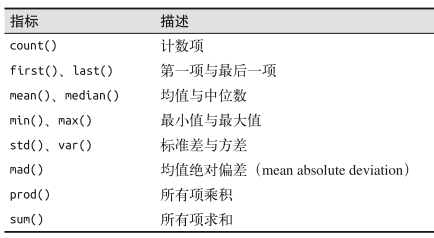


In [189]:
df = pd.DataFrame({'A': rng.rand(5),
'B': rng.rand(5)})
df

,A,B
0,0.708073,0.181825
1,0.020584,0.183405
2,0.969910,0.304242
3,0.832443,0.524756
4,0.212339,0.431945


In [190]:
df.mean()

A    0.548670
B    0.325235
dtype: float64

In [191]:
df.mean(axis='columns')

0    0.444949
1    0.101995
2    0.637076
3    0.678600
4    0.322142
dtype: float64

这里我是用行星数据集来做演示

In [14]:
planets = pd.read_csv(r'D:/zeta/pythonTMclass/datasets/planets.csv')

In [193]:
planets.head(20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


In [194]:
planets.shape

(1035, 6)

In [195]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## 排序

In [15]:
planets_order = planets.sort_values(by='year',ascending=True)

In [16]:
planets_order.head()

,method,number,orbital_period,mass,distance,year
441,Radial Velocity,1,83.888000,11.680,40.57,1989
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
16,Radial Velocity,1,4.230785,0.472,15.36,1995


##  GroupBy ：分割、应用和组合
累计方法可以让我们对数据集有一个笼统的认识，但是我们经常还需要对某些标签
或索引的局部进行累计分析，这时就需要用到 groupby 了

### 分割、应用和组合
一个经典分割 - 应用 - 组合操作示例如图所示，其中“apply”的是一个求和函数

• 分割步骤将 DataFrame 按照指定的键分割成若干组。

• 应用步骤对每个组应用函数，通常是累计、转换或过滤函数。

• 组合步骤将每一组的结果合并成一个输出数组。

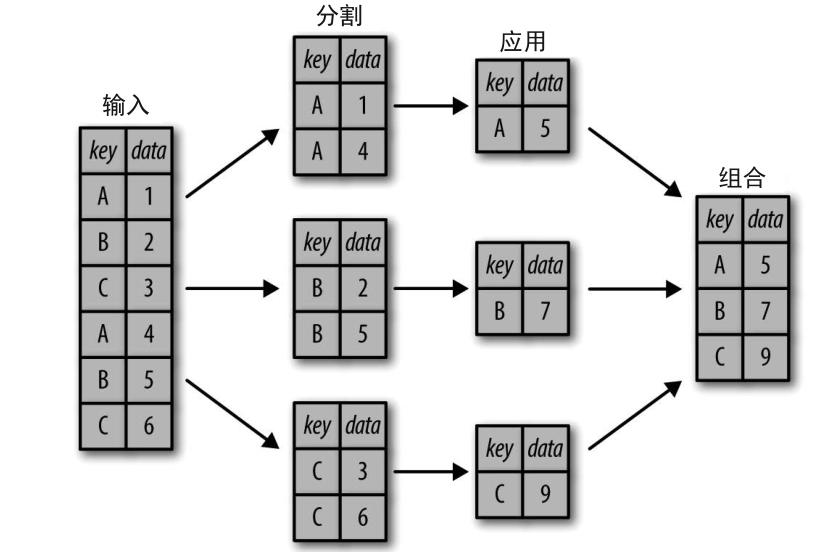

In [196]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(1,7)}, columns=['key', 'data'])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [197]:
df.groupby('key').sum()

,data
key,
A,5
B,7
C,9


### GroupBy 对象及操作
GroupBy 中最重要的操作可能就是 aggregate、filter、transform 和 apply（累计、过滤、转
换、应用）

#### GroupBy 对象
GroupBy 对象是一种非常灵活的抽象类型。在大多数场景中，你可以将它看成是 DataFrame
的集合，在底层解决所有难题。

In [198]:
planets.groupby('method')

In [199]:
planets.groupby('method')['orbital_period']

In [201]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [202]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


#### 累计
目前比较熟悉的 GroupBy 累计方法只有 sum() 和 median() 之类的简单函数，
但是 aggregate() 其实可以支持更复杂的操作，比如字符串、函数或者函数列表，并且
能一次性计算所有累计值

In [203]:
import pandas as pd

In [204]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [205]:
 df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [217]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### 过滤
过滤操作可以让你按照分组的属性丢弃若干数据。

In [207]:
def filter_func(x):
    return x['data2'].std() > 4
print(df)
print('*'*20)
print(df.groupby('key').std())
print('*'*20)
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
********************
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
********************
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


#### 转换
累计操作返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全
量数据。

数据经过转换之后，其形状与原来的输入数据是一样的。

In [208]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [209]:
d_t = df.groupby('key').transform(lambda x: x - x.mean())

In [210]:
d_t

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [211]:
df['norm_1'] = d_t.data1

In [212]:
df

,key,data1,data2,norm_1
0,A,0,5,-1.5
1,B,1,0,-1.5
2,C,2,3,-1.5
3,A,3,3,1.5
4,B,4,7,1.5
5,C,5,9,1.5


#### apply() 方法
apply() 方法让你可以在每个组上应用任意方法。这个函数输入一个
DataFrame

In [213]:
def some_func(x):
    d2_max = x['data2'].max()
    d2_min = x['data2'].min()
    d2_minmax = np.abs(d2_max-d2_min)
    d1_norm_by_d2 = np.abs(x['data1']/d2_minmax)
    return d1_norm_by_d2

In [214]:
df2 = df.groupby('key').apply(some_func)

In [215]:
df

,key,data1,data2,norm_1
0,A,0,5,-1.5
1,B,1,0,-1.5
2,C,2,3,-1.5
3,A,3,3,1.5
4,B,4,7,1.5
5,C,5,9,1.5


In [216]:
df2

key   
A    0    0.000000
     3    1.500000
B    1    0.142857
     4    0.571429
C    2    0.333333
     5    0.833333
Name: data1, dtype: float64

**groupby** 一些实用列子

**分组排序**：不改变数据行数

df3 = df.groupby('col_1').apply(lambda x:x.sort_values('col_2',ascending=False))

# 数据透视表
数据透视表（pivot table）是一种类似groupby操作方法，常见于 Excel 与类似的表格应用中。数据透视表将每一列
数据作为输入，输出将数据不断细分成多个维度累计信息的二维数据表。

## 数据透视表演示
这一节的示例将采用泰坦尼克号的乘客信息数据库来演示

In [218]:
import numpy as np
import pandas as pd

In [219]:
titanic = pd.read_csv(r'D:/zeta/pythonTMclass/datasets/titanic_train.csv')

In [220]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


直观感受：总体来说，有四分之三的女性被救，但只有五分之
一的男性被救

进一步探索，同时观察不同性别与船舱等级的生还情
况。根据 GroupBy 的操作流程，我们也许能够实现想要的结果：将船舱等级（ 'class' ）与
性别（ 'sex' ）分组，然后选择生还状态（ 'survived' ）列，应用均值（ 'mean' ）累计函
数，再将各组结果组合，最后通过行索引转列索引操作将最里层的行索引转换成列索引，
形成二维数组。

In [223]:
titanic2 = titanic.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean')

In [224]:
titanic2

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [225]:
titanic2.unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 语法
用 DataFrame 的 pivot_table 实现的效果等同于上一节的管道命令

In [226]:
 titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


与 GroupBy 方法相比，这行代码可读性更强，而且取得的结果也一样

**多级数据透视表**与 GroupBy 类似，数据透视表中的分组也可以通过各种参数指定多个等级

把年龄（ 'age' ）也加进去作为第三个维度，这就可以通过 pd.cut 函数将年龄进
行分段：

In [227]:
age = pd.cut(titanic['Age'], [0, 18, 80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

## 其他数据透视表选项
>DataFrame.pivot_table(data, values=None, index=None, columns=None,
aggfunc='mean', fill_value=None, margins=False,
dropna=True, margins_name='All')

aggfunc 参数用于设置累计函数类型，默认值是均值（ mean ）。与 GroupBy 的用法一样，累
计函数可以用一些常见的字符串（ 'sum' 、 'mean' 、 'count' 、 'min' 、 'max' 等）表示，也
可以用标准的累计函数（ np.sum() 、 min() 、 sum() 等）表示。

In [12]:
titanic.pivot_table(index='Sex', columns='Pclass',
aggfunc={'Survived':sum, 'Fare':'mean'})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

# 字符型操作
 Python 的一个优势就是字符串处理起来比较容易。在此基础上创建的 Pandas 同样提
供了一系列向量化字符串操作（vectorized string operation），它们都是在处理（清洗）现实
工作中的数据时不可或缺的功能。

## 字符串操作简介

In [228]:
 data = ['peter', 'Paul', 'MARY', 'gUIDO']

In [229]:
data_capitalize = [s.capitalize() for s in data]
data_capitalize

['Peter', 'Paul', 'Mary', 'Guido']

In [15]:
 data2 = ['peter', 'Paul',None, 'MARY', 'gUIDO']

In [230]:
data2_capitalize = [s.capitalize() for s in data2]

NameError: name 'data2' is not defined

Pandas 为包含字符串的 Series 和 Index 对象提供的 str 属性堪称两全其美的方法，它既
可以满足向量化字符串操作的需求，又可以正确地处理缺失值。

In [231]:
names = pd.Series(data)
print(names)
print(names.str.capitalize())

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object
0    Peter
1     Paul
2     Mary
3    Guido
dtype: object


## 方法举例

**与Python字符串方法相似的方法**
下面的表
格列举了 Pandas 的 str 方法借鉴 Python 字符串方法的内容：
>len() lower() translate() islower()
ljust() upper() startswith() isupper()
rjust() find() endswith() isnumeric()
center() rfind() isalnum() isdecimal()
zfill() index() isalpha() split()
strip() rindex() isdigit() rsplit()
rstrip() capitalize() isspace() partition()
lstrip() swapcase() istitle() rpartition()

In [232]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [233]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [234]:
monte_df = pd.DataFrame(monte,columns=['name'])

In [235]:
monte_df

,name
0,Graham Chapman
1,John Cleese
2,Terry Gilliam
3,Eric Idle
4,Terry Jones
5,Michael Palin


In [236]:
monte_df['upper_name'] =  monte_df["name"].str.upper()
monte_df

,name,upper_name
0,Graham Chapman,GRAHAM CHAPMAN
1,John Cleese,JOHN CLEESE
2,Terry Gilliam,TERRY GILLIAM
3,Eric Idle,ERIC IDLE
4,Terry Jones,TERRY JONES
5,Michael Palin,MICHAEL PALIN


In [237]:
monte_df['name_len'] = monte_df['name'].str.len()

In [238]:
monte_df

,name,upper_name,name_len
0,Graham Chapman,GRAHAM CHAPMAN,14
1,John Cleese,JOHN CLEESE,11
2,Terry Gilliam,TERRY GILLIAM,13
3,Eric Idle,ERIC IDLE,9
4,Terry Jones,TERRY JONES,11
5,Michael Palin,MICHAEL PALIN,13


**使用正则表达式的方法**
有一些支持正则表达式的方法可以用来处理每个字符串元素
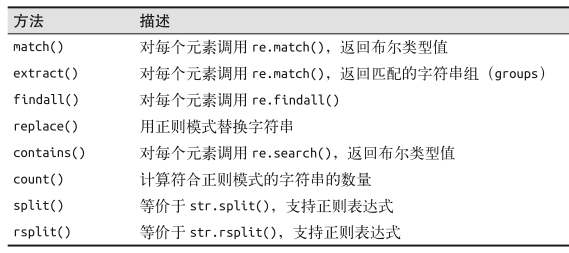

In [239]:
monte_df['first_name'] = monte_df['name'].str.extract('([A-Za-z]+)')

In [240]:
monte_df

,name,upper_name,name_len,first_name
0,Graham Chapman,GRAHAM CHAPMAN,14,Graham
1,John Cleese,JOHN CLEESE,11,John
2,Terry Gilliam,TERRY GILLIAM,13,Terry
3,Eric Idle,ERIC IDLE,9,Eric
4,Terry Jones,TERRY JONES,11,Terry
5,Michael Palin,MICHAEL PALIN,13,Michael


## 其他可能会用到的方法
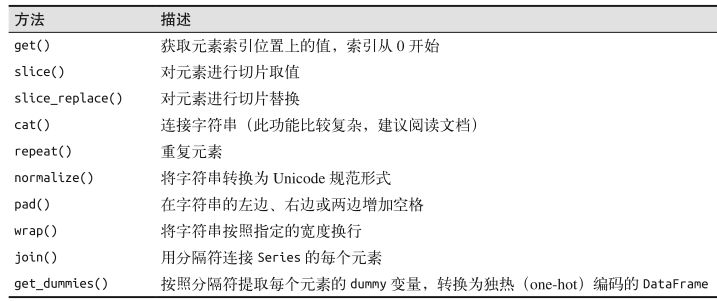

** 向量化字符串的取值与切片操作**

In [241]:
monte_df['3Char'] = monte_df['name'].str[:3]

In [242]:
monte_df

,name,upper_name,name_len,first_name,3Char
0,Graham Chapman,GRAHAM CHAPMAN,14,Graham,Gra
1,John Cleese,JOHN CLEESE,11,John,Joh
2,Terry Gilliam,TERRY GILLIAM,13,Terry,Ter
3,Eric Idle,ERIC IDLE,9,Eric,Eri
4,Terry Jones,TERRY JONES,11,Terry,Ter
5,Michael Palin,MICHAEL PALIN,13,Michael,Mic


**指标变量**

In [243]:
monte_df['info'] = ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']

In [244]:
monte_df

,name,upper_name,name_len,first_name,3Char,info
0,Graham Chapman,GRAHAM CHAPMAN,14,Graham,Gra,B|C|D
1,John Cleese,JOHN CLEESE,11,John,Joh,B|D
2,Terry Gilliam,TERRY GILLIAM,13,Terry,Ter,A|C
3,Eric Idle,ERIC IDLE,9,Eric,Eri,B|D
4,Terry Jones,TERRY JONES,11,Terry,Ter,B|C
5,Michael Palin,MICHAEL PALIN,13,Michael,Mic,B|C|D


In [245]:
monte_df2 = monte_df['info'].str.get_dummies('|')

In [246]:
monte_df2

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [247]:
monte_df3 = monte_df.join(monte_df2)

In [248]:
monte_df3

,name,upper_name,name_len,first_name,3Char,info,A,B,C,D
0,Graham Chapman,GRAHAM CHAPMAN,14,Graham,Gra,B|C|D,0,1,1,1
1,John Cleese,JOHN CLEESE,11,John,Joh,B|D,0,1,0,1
2,Terry Gilliam,TERRY GILLIAM,13,Terry,Ter,A|C,1,0,1,0
3,Eric Idle,ERIC IDLE,9,Eric,Eri,B|D,0,1,0,1
4,Terry Jones,TERRY JONES,11,Terry,Ter,B|C,0,1,1,0
5,Michael Palin,MICHAEL PALIN,13,Michael,Mic,B|C|D,0,1,1,1


# 时间序列操作

• 时间戳表示某个具体的时间点（例如 2015 年 7 月 4 日上午 7 点）。

• 时间间隔与周期表示开始时间点与结束时间点之间的时间长度，例如 2015 年（指的是
2015 年 1 月 1 日至 2015 年 12 月 31 日这段时间间隔）。周期通常是指一种特殊形式的
时间间隔，每个间隔长度相同，彼此之间不会重叠（例如，以 24 小时为周期构成每一天）。

• 时间增量（time delta）或持续时间（duration）表示精确的时间长度（例如，某程序运
行持续时间 22.56 秒）。

## python的时间与日期
**原生Python的日期与时间工具： datetime 与 dateutil**

In [251]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [252]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [253]:
 date.strftime('%A')

'Saturday'

**时间类型数组：NumPy的 datetime64 类型**

In [254]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [255]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [256]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [257]:
np.datetime64('2015-07-04')+1

numpy.datetime64('2015-07-05')

In [258]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [259]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

对于日常工作中的时间数据类型，默认单位都用纳秒 datetime64[ns] 

**Pandas的日期与时间工具**

Pandas 通过一组 Timestamp 对象就可以创建一个可以作为 Series 或 DataFrame 索引的
DatetimeIndex

In [260]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [261]:
pd.to_datetime('20211012')

Timestamp('2021-10-12 00:00:00')

In [262]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas时间序列：用时间作为索引

In [263]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [264]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [265]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas时间序列数据结构
• 针对时间戳数据，Pandas 提供了 Timestamp 类型。对应的索引数据结构是 DatetimeIndex 。

• 针对时间周期数据，Pandas 提供了 Period 类型。对应的索引数据结构是 PeriodIndex 。

• 针对时间增量或持续时间，Pandas 提供了 Timedelta 类型。对应的索引数据结构是 TimedeltaIndex 。

最基础的日期 / 时间对象是 Timestamp 和 DatetimeIndex 。这两种对象可以直接使用，最常用
的方法是 pd.to_datetime() 函数，它可以解析许多日期与时间格式。对 pd.to_datetime() 传
递一个日期会返回一个 Timestamp 类型，传递一个时间序列会返回一个 DatetimeIndex 类型：

In [266]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [267]:
dates2 = pd.to_datetime('4th of July, 2015')
dates2

Timestamp('2015-07-04 00:00:00')

任何 DatetimeIndex 类型都可以通过 to_period() 方法和一个频率代码转换成 PeriodIndex
类型。

In [268]:
 dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

**有规律的时间序列： pd.date_range()**
为了能更简便地创建有规律的时间序列，Pandas 提供了一些方法： pd.date_range() 可以
处理时间戳、 pd.period_range() 可以处理周期、 pd.timedelta_range() 可以处理时间间
隔。

In [269]:
 pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [270]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

## 时间频率和频率采样

D 天（calendar day，按日历算，含双休日）   B 天（business day，仅含工作日）
W 周（weekly）
M 月末（month end）                 BM 月末（business month end，仅含工作日）
Q 季末（quarter end）                BQ 季末（business quarter end，仅含工作日）
A 年末（year end）                  BA 年末（business year end，仅含工作日）
H 小时（hours）                    BH 小时（business hours，工作时间）
T 分钟（minutes）
S 秒（seconds）
L 毫秒（milliseonds）
U 微秒（microseconds）
N 纳秒（nanoseconds）

In [271]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

处理时间序列数据时，经常需要按照新的频率（更高频率、更低频率）对数据进行重新取样。
你可以通过 resample() 方法解决这个问题，或者用更简单的 asfreq() 方法。

这两个方法的主要差异在于， resample() 方法是以数据累计（data aggregation）为基础，而
asfreq() 方法是以数据选择（data selection）为基础。

# 应用案列
这里我找了百度最近10年的股票价格走势数据作为案列分析

In [110]:
# from pandas_datareader import data
# bidu = data.get_data_yahoo('BIDU', '1/1/2010','20/9/2020')
# bidu.head()
# bidu.to_csv(r'D:\zeta\pythonTMclass\datasets\bidu.csv',index=True,header=True)

In [272]:
baidu = pd.read_csv(r'D:\zeta\pythonTMclass\datasets\bidu.csv')

In [ ]:
baidu.to_csv('D:\zeta\pythonTMclass\datasets\bidu2.csv')

In [273]:
baidu.shape

(2698, 7)

In [274]:
baidu.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,41.900002,41.040001,41.771000,41.123001,6715000.0,41.123001
1,2010-01-04,41.700001,40.779999,41.598000,41.002998,13461000.0,41.002998
2,2010-01-05,41.200001,40.243999,41.054001,40.590000,15720000.0,40.590000
3,2010-01-06,42.009998,40.929001,41.900002,41.250000,23432000.0,41.250000
4,2010-01-07,41.154999,40.205002,41.040001,40.463001,14326000.0,40.463001


In [275]:
baidu.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

将Date转换为时间类型

In [276]:
baidu['Date'] = pd.to_datetime(baidu['Date'], format ='%Y-%m-%d')

In [277]:
baidu.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

## 只取收盘价进行分析

In [278]:
#设置时间索引
baidu = baidu.set_index('Date')

In [279]:
#选择收盘价作为一个serise,单独分析
close_df = baidu['Close']

In [280]:
close_df[:10]

Date
2009-12-31    41.123001
2010-01-04    41.002998
2010-01-05    40.590000
2010-01-06    41.250000
2010-01-07    40.463001
2010-01-08    40.426998
2010-01-11    40.056999
2010-01-12    38.648998
2010-01-13    43.948002
2010-01-14    46.423000
Name: Close, dtype: float64

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

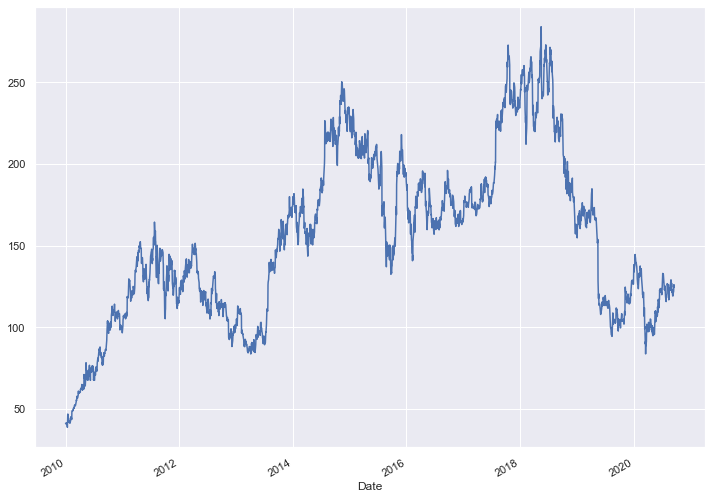

In [282]:
# 先大致看看收盘价数据曲线
plt.figure(figsize=(12,9))
close_df.plot()

让我们用两种方法对数据进行向后取样（down-sample）。这里
采用年末（' BA '，最后一个工作日）作为对数据进行重新取样，并画图

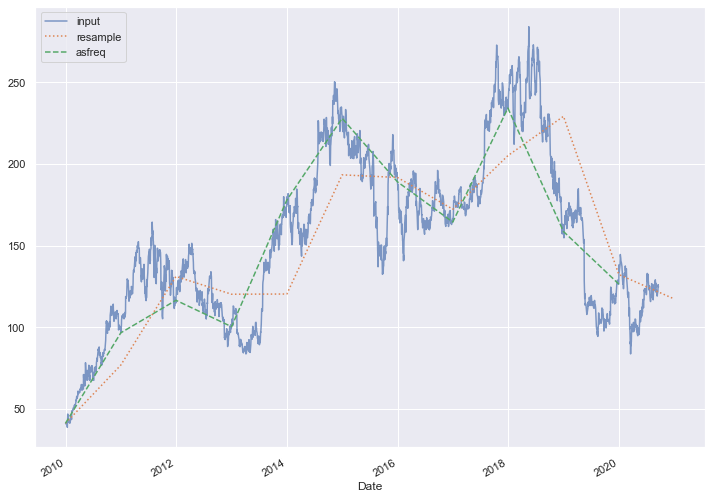

In [283]:
plt.figure(figsize=(12,9))
close_df.plot(alpha=0.7, style='-')
close_df.resample('BA').mean().plot(style=':')
close_df.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')

### 时间偏移shift(选学)
Pandas 有两种解决这类问题的方
法： shift() 和 tshift() 。简单来说， shift() 就是迁移数据，而 tshift() 就是迁移索引。

D:\ProgramFiles\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  import sys


<Figure size 864x648 with 0 Axes>

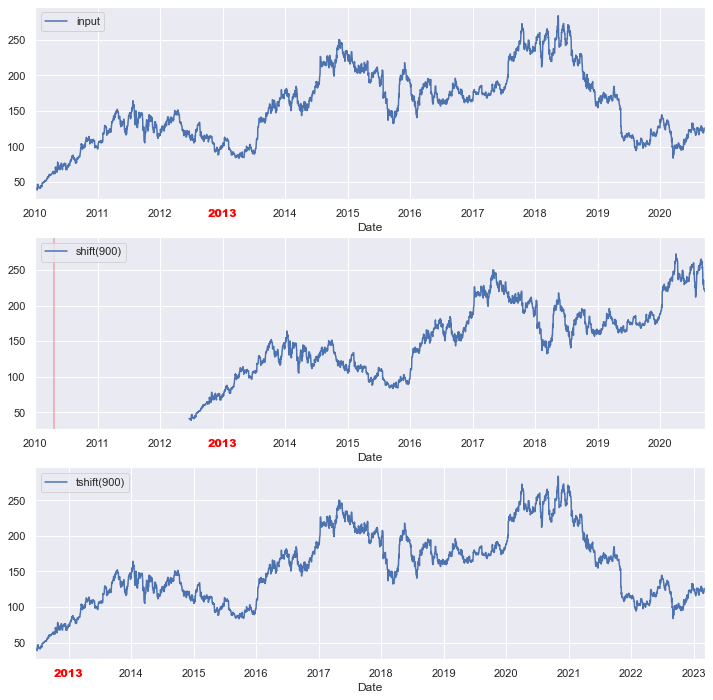

In [284]:
plt.figure(figsize=(12,9))
fig, ax = plt.subplots(3, sharey=True,figsize=(12,12))
# 对数据应用时间频率，用向后填充解决缺失值
close_df = close_df.asfreq('D', method='pad')
close_df.plot(ax=ax[0])
close_df.shift(900).plot(ax=ax[1])
close_df.tshift(900).plot(ax=ax[2])
# 设置图例与标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].legend(['tshift(900)'], loc=2)